### Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset description

In [2]:
df = pd.read_csv("/kaggle/input/hr-competency-scores-for-screening/dataset.csv")

In [3]:
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [4]:
df.shape

(300, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   years_of_experience          300 non-null    float64
 1   functional_competency_score  300 non-null    float64
 2   top1_skills_score            300 non-null    float64
 3   top2_skills_score            300 non-null    float64
 4   top3_skills_score            300 non-null    float64
 5   behavior_competency_score    300 non-null    float64
 6   top1_behavior_skill_score    300 non-null    float64
 7   top2_behavior_skill_score    300 non-null    float64
 8   top3_behavior_skill_score    300 non-null    float64
 9   call_for_interview           300 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.231778,0.578350,0.681111,0.510667,0.521667,0.457692,0.480880,0.434732,0.426792,0.530000
std,0.238689,0.156784,0.238006,0.229482,0.230523,0.260942,0.244018,0.225863,0.248246,0.499933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.480041,0.527778,0.300000,0.300000,0.230769,0.297052,0.249501,0.224828,0.000000
50%,0.200000,0.576121,0.666667,0.500000,0.500000,0.358974,0.433097,0.401338,0.389711,1.000000
75%,0.400000,0.685611,0.888889,0.700000,0.700000,0.666667,0.687145,0.612519,0.632039,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#almost balanced dataset
df['call_for_interview'].value_counts()

1    159
0    141
Name: call_for_interview, dtype: int64

In [8]:
df.duplicated().sum()

0

### Exploratory Data Analysis

<AxesSubplot: xlabel='years_of_experience', ylabel='Count'>

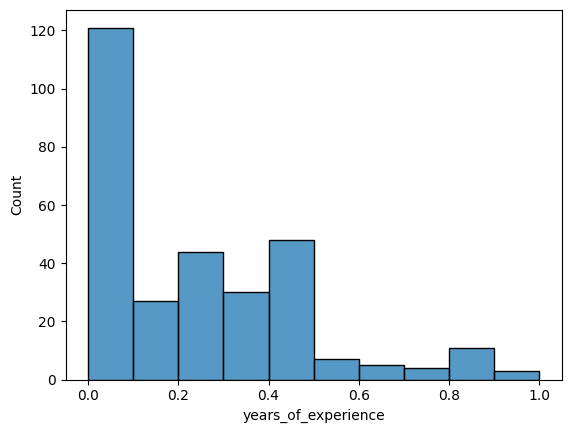

In [9]:
#mostly we have freshers
sns.histplot(data = df, x = "years_of_experience")

<AxesSubplot: xlabel='functional_competency_score', ylabel='Count'>

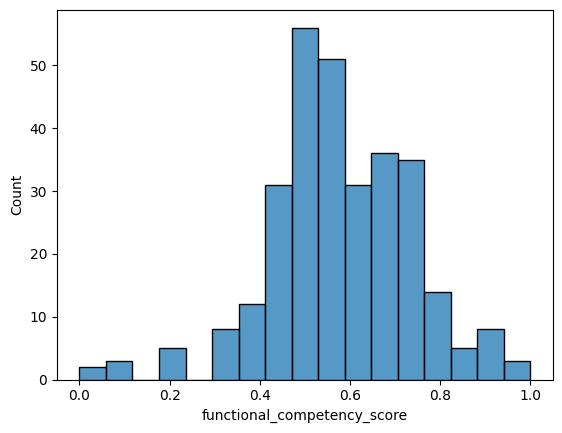

In [10]:
sns.histplot(data = df, x = "functional_competency_score")

<AxesSubplot: xlabel='behavior_competency_score', ylabel='Count'>

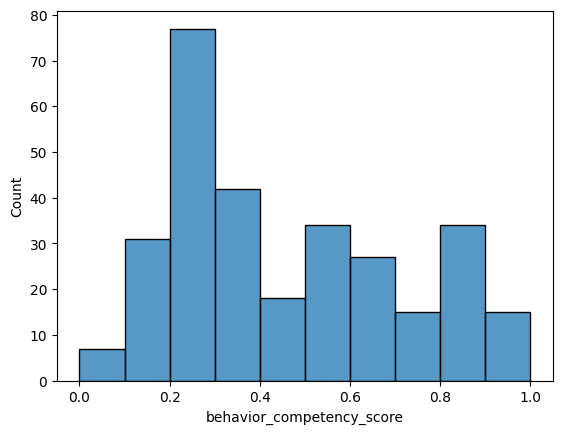

In [11]:
sns.histplot(data = df, x = "behavior_competency_score")

In [12]:
#years_of_experience, functional_competency_score, behavior_competency_score v/s call_for_interview
#can not plot boxplot as we have to bin continuous variable and then plot with discrete one

<AxesSubplot: >

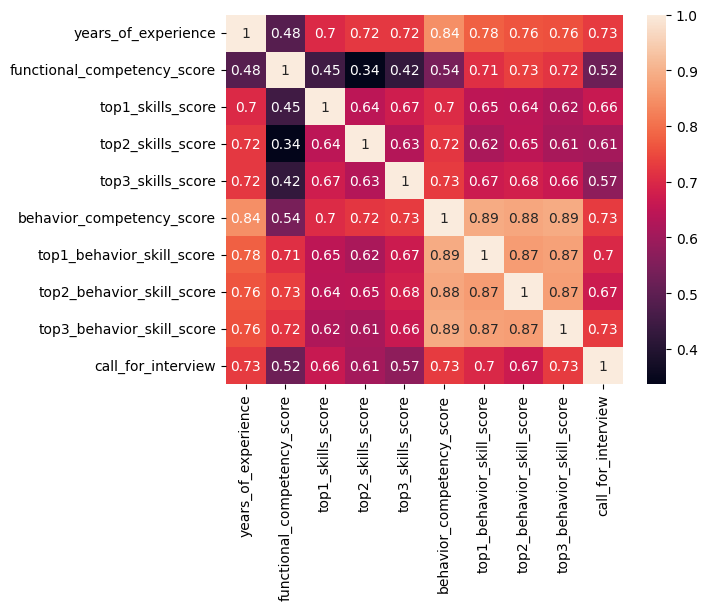

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
y = df['call_for_interview']
X = df.drop(['call_for_interview'], axis = 1)

### Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8, shuffle=True)

### Model Building

In [16]:
classifier = LogisticRegression()

In [17]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = classifier.predict(X_test)

### Model Evaluation

Text(50.722222222222214, 0.5, 'Actual')

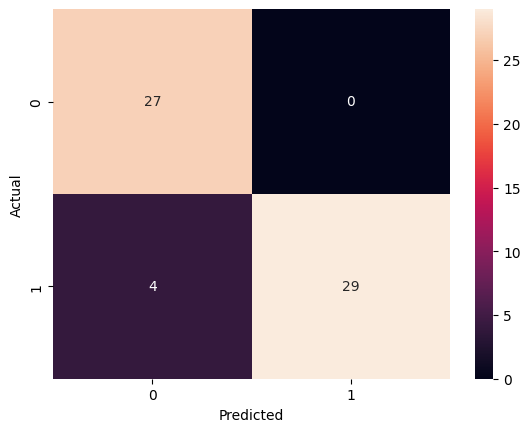

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        27
           1       1.00      0.88      0.94        33

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60

